# Построение простого нестационарного решения уравнения фильтрации

Материалы курсов "Исследования скважин и пластов" и "Гидродинамические исследования скважин" в РГУ нефти и газа имени И.М.Губкина.

Хабибуллин Ринат 2021 г.

Для установившегося режима фильтрации давление в пласте не меняется. Для псевдо-установившегося режима постоянным остается перепад давления между пластом и забоем. После запуска, остановки или изменения режима работы скважины эти условия не выполняются. Давление в различных точках пласта может меняться по разному. Такой режим называют неустановившимся, а решения его описывающие нестационарными (зависят от времени).

## Безразмерные переменные 

Часто для анализа уравнений неустановившейся фильтрации используются безразмерные переменные
$$ r_D = \frac{r}{r_w} $$
$$ t_D = \frac{kt}{\phi \mu c_t r_w^2}$$
$$ p_D = \frac{2 \pi kh}{q_s B \mu} \left( p_i - p_{wf} \right) $$

Здесь использование единицы измерения СИ.
* $q_s$ - дебит скважины на поверхности, приведенный к нормальным условиям м3/с
* $\phi$ - пористость, доли единиц
* $\mu$ - вязкость нефти в пласте, Па с
* $B$ - объемный коэффициент нефти, м3/м3
* $p_i$ - начальное давление в пласте, Па
* $p_{wf}$ - давление забойное, Па
* $c_t$ - общая сжимаемость системы в пласте, 1/Па

Использование безразмерных переменных позволяет упростить уравнение фильтрации, которое примет вид

$$ \frac{\partial p_D}{ \partial t_D} = \frac{1}{r_D} \frac{ \partial{ \left( r_D \dfrac{\partial p_D}{ \partial r_D} \right) } }{ \partial{r_D} } $$

Решение этого уравнения - функция безразмерного давления от безразмерных времени и расстояния $p_D(r_D, t_D) $

Для практических расчетов удобнее бывает использовать безразмерные переменные полученные для практических метрических единиц измерения.
$$ r_D = \frac{r}{r_w} $$
$$ t_D = \frac{0.00036 kt}{\phi \mu c_t r_w^2}$$
$$ p_D = \frac{kh}{ 18.41 q_s B \mu} \left( p_i - p_{wf} \right) $$

Здесь использование единицы измерения СИ.
* $q_s$ - дебит скважины на поверхности, приведенный к нормальным условиям м3/сут
* $\phi$ - пористость, доли единиц
* $\mu$ - вязкость нефти в пласте, сП
* $B$ - объемный коэффициент нефти, м3/м3
* $p_i$ - начальное давление в пласте, атм
* $p_{wf}$ - давление забойное, атм
* $c_t$ - общая сжимаемость системы в пласте, 1/атм

## Решение линейного стока
Для решения уравнения фильтрации - линейного дифференциального уравнения в частных производных второго порядка необходимо задать начальные и граничные условия.
Самое простое решение можно получить для случая вертикальной скважины бесконечно малого радиуса запускающейся с постоянным дебитом. Условия соответствующие этому случаю можно выразить следующим образом

* начальное условие. До запуска скважины в момент времени  $t_D = 0$ давление в пласте равно начальному во всех точках $p=p_i$
$$ t_D < 0, p_D = 0 $$

* условие постоянства дебита на скважине - граничное условие на скважине
$$ \lim_{r_D \to 0} {r_D \frac{\partial p_D}{\partial r_D}} = -1$$

* условие на бесконечном расстоянии возмущения от скважине нет
$$ r_D = \infty, p_D = 0$$

В этом случае решение может быть выражено через функцию интегральной экспоненты
$$ p_D(r_D,t_D) = - \frac{1}{2} Ei \left(- \dfrac{ r_D^2}{4t_d} \right)$$

где -Ei(-x) - интегральная показательная функция.

$$Ei(x)=-\int\limits_{x}^{\infty}\frac{e^{-t}}{t}\,\mathrm dt=\gamma+\operatorname{ln}|-x|+\sum\limits_{n\ge1}\frac{{-x}^n}{n!\cdot n}, \;  x\in\mathbb R,\; (1)$$


## Функция интегральной экспоненты Ei

Для расчета значений функции Ei можно использовать библиотеки scipy.special или mpmath. Первый вариант быстрее, второй поддерживает вычисления с произвольной точностью и позволяет использовать больше возможностей при математических расчетах, например рассчитывать численные обратные преобразования лапласа.

In [1]:
# импортируем библиотеки для расчетов

# numpy используем для работы с массивами и подготовки данных для построения графиков. 
# Также в некоторых функциях используем возможности векторных расчетов numpy
import numpy as np
# matplotlib используем для построения графиков
import matplotlib.pyplot as plt

# mpmath используем для расчета спец фукнций и математических операций
from mpmath import *
mp.dps = 5;          # здесь задаем желаемую точность расчетов mpmath (количество знаков после запятой)
mp.pretty = True      # здесь задаем вывод функций mpmath в виде чисел а не объетов

# scipy.special используем как альтернативный вариант расчета специальных функций
import scipy.special as sc

### Сравнение скорости расчетов mpmath и scipy.special на примере Ei

Для рациоанального использования различных библиотек полезно понимать различия в их реализации. Один из факторов - скорость проведения расчетов. Скорость вычислений можно оценить с использованием специальной команды `%timeit`, которая запускает соответствующую операцию несколько раз и выводит статистику расчетов. Абсолютный цифры достаточно сильно будут зависеть от мощности компьютера на котором проводятся расчеты, но сравнение времен на расчет разных реализаций будет достаточно показательным. 

Если кому то нужны дополнительный баллы, то хорошо бы было сделать наглядных графический вывод результатов расчета (чтобы показывались и средние значения времен и отклонения)

количество элементов в массиве для расчета 200
вычисляем с использованием scipy.special.expi с использованием векторного расчета много раз с измерением времени на вычисления 
13.2 µs ± 264 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
вычисляем с использованием scipy.special.expi много раз с измерением времени на вычисления 
240 µs ± 8.01 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
вычисляем с использованием mpmath.ei много раз (точность 5) с измерением времени на вычисления 
2.82 ms ± 166 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
вычисляем с использованием mpmath.ei много раз (точность 10) с измерением времени на вычисления 
2.89 ms ± 178 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
вычисляем с использованием mpmath.ei много раз (точность 15) с измерением времени на вычисления 
3.02 ms ± 21.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


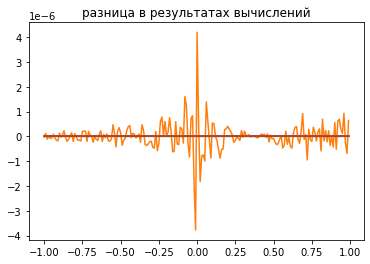

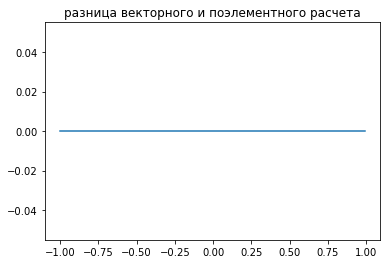

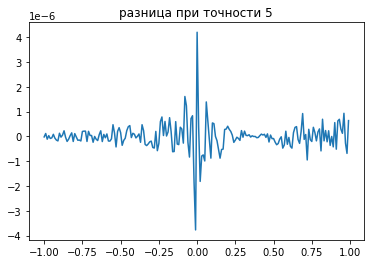

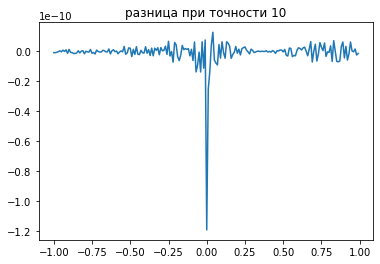

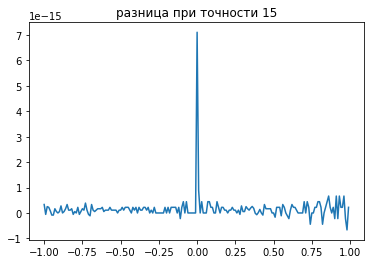

In [2]:
# рассчитаем набор значений Ei
x = np.arange(-1,1, 0.01)
print("количество элементов в массиве для расчета " + str(len(x)))


# нулевой вариант расчет
print("вычисляем с использованием scipy.special.expi с использованием векторного расчета много раз с измерением времени на вычисления ")
%timeit ei_0 = sc.expi(x) 
ei_0 = sc.expi(x)

# первый вариант расчет
print("вычисляем с использованием scipy.special.expi много раз с измерением времени на вычисления ")
%timeit ei_1 = np.array([sc.expi(xi) for xi in x])
ei_1 = np.array([sc.expi(xi) for xi in x])

# второй вариант расчета
mp.dps = 5;  
print("вычисляем с использованием mpmath.ei много раз (точность 5) с измерением времени на вычисления ")
%timeit ei_2 = np.array([ei(xi) for xi in x])
ei_2 = np.array([ei(xi) for xi in x])

# третий вариант расчета
mp.dps = 10;  
print("вычисляем с использованием mpmath.ei много раз (точность 10) с измерением времени на вычисления ")
%timeit ei_3 = np.array([ei(xi) for xi in x])
ei_3 = np.array([ei(xi) for xi in x])

# четверный вариант расчета
mp.dps = 15;  
print("вычисляем с использованием mpmath.ei много раз (точность 15) с измерением времени на вычисления ")
%timeit ei_4 = np.array([ei(xi) for xi in x])
ei_4 = np.array([ei(xi) for xi in x])

de_0 = ei_0-ei_1
de_1 = ei_2-ei_1
de_2 = ei_3-ei_1
de_3 = ei_4-ei_1

plt.plot(x, de_0)
plt.plot(x, de_1)
plt.plot(x, de_2)
plt.plot(x, de_3)
plt.title("разница в результатах вычислений")
plt.show()

plt.plot(x, de_0)
plt.title("разница векторного и поэлементного расчета")
plt.show()

plt.plot(x, de_1)
plt.title("разница при точности 5")
plt.show()

plt.plot(x, de_2)
plt.title("разница при точности 10")
plt.show()

plt.plot(x, de_3)
plt.title("разница при точности 15")
plt.show()

# Построение графика функции Ei

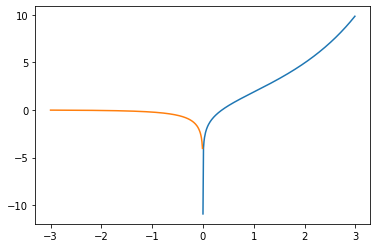

In [3]:
# для скорости и удобства используем sc.expi

x = np.arange(1e-5,3,0.01)

x1 = np.arange(-3,-1e-5,0.01)

plt.plot(x, sc.expi(x))
plt.plot(x1, sc.expi(x1))
plt.show()

Если кому то нужны дополнительный баллы, то хорошо бы было сделать красивое отображение графика функции Ei (чтобы это ни значило)

Для нас практический интерес будет представлять часть графика для отрицательных значений около нуля (красная линия). Для этой области хорошо работает логарифмическая аппроксимация.

Опять же, если кому то нужны дополнительные баллы, то хорошо бы нарисовать графики с логарифмической аппроксимацией на которых была бы показана граница логарифмической аппроксимации

# Решение линейного стока 

$$ p_D(r_D,t_D) = - \frac{1}{2} Ei \left(- \dfrac{ r_D^2}{4t_d} \right)$$

In [4]:
# Решение линейного стока уравнения фильтрации
def pd_ei(rd, td):
  return -1/2*sc.expi(-rd**2 / 4 / td)

### Одно решение для произвольного момента времени

Пример показывает как построить распределение давления для заданного момента времени. Помните что тут безразмерное давление и время. 

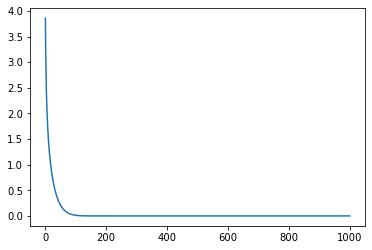

In [5]:

td = 1000
rr = np.arange(1, 1000, 1)
# при построении используем векторный расчет
plt.plot(rr, pd_ei(rr,td) )
plt.show()

Хорошо видна воронка депрессии. Если изменить значение td и перестроить график можно убедиться, что решение будет меняться и воронка депресси будет менять свой размер. Убедиться в этом можно построить сразу много графиков

### Сразу много решений для разных моментов времени

Мы можем зациклить расчет распределений давления, и сформировать много кривых на графике matplotlib и потом отобразить их. Получится прикольная картинка.

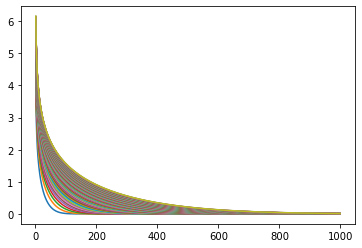

In [6]:
# Пример построения сразу нескольких решений на одном графике
# Зададим массив (итератор) определяющий количество графиков которые мы хотим построить
n=np.arange(1,100,1)
# зададим диапазон изменения расстояний и количество точек для которых строятся кривые
rr = np.arange(1, 1000, 1)

# цикл расчета. Полезно понимать тут, что функция Ei будет вызывать число раз равное
# произведению количества графиков на количество точек. 
# для сложных функций это время может оказаться достаточно заметным
for i in n:
    td = 1000*i
      # здесь используем расчет заполнения массива с использованием итератора python - 
      # не самый быстрый вариант для этой функции, но работает
    plt.plot(rr, [pd_ei(ri,td) for ri in rr])
plt.show()

На графике можно заметить, что со временем воронка депрессии расширяется. Это позволяет ввести понятие радиуса влияния скважины, которое будет обсуждаться позднее

# Задания для самостоятельной работы

Для совершенствования навыков работы с python выполните следующие задания:

1. Постройте график распределения давления в пласте для композитного пласта. В композитном пласте на расстоянии $r<r_1$ проницаемость равна $k=k_1$, а для $r>=r_1$, $k=k_2$. Как будет меняться воронка депрессии в таком пласте со временем?
2. Постройте двумерную тепловую карту распределения давления в пласте для моделей однородного пласта и композитного пласта. 
3. Постройте график зависимости радиуса влияния скважины от времени.